In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# 한글폰트 출력 가능 코드
from matplotlib import rc
rc('font', family='AppleGothic') # Mac Os
#rc('font', family='NanumGothic') # Windows Os
plt.rcParams['axes.unicode_minus'] = False

# 데이터 불러오기 및 전처리 시행

In [2]:
train = pd.read_csv('https://raw.githubusercontent.com/signature95/tistory/main/code/titanic_train.csv')
test = pd.read_csv(f'https://raw.githubusercontent.com/signature95/tistory/main/code/titanic_test.csv')

In [4]:
train0 = train.drop(['Age', 'Cabin'], axis = 1)
test0 = test.drop(['Age', 'Cabin'], axis = 1)

In [5]:
#train0에서 Embarked가 결측인 두 행을 제거합니다.
train0 = train0.dropna()
#제거 여부 확인해봅니다.
train0.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [6]:
#test0에서 결측된 Fare값을 평균으로 대체합니다.
test0 = test0.fillna(test0.mean())
#처리 여부를 확인해봅니다.
test0.isna().sum()

/var/folders/1v/ctxpzb994v98h43xyk972tmc0000gn/T/ipykernel_4595/3973668754.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  test0 = test0.fillna(test0.mean())


PassengerId    0
Pclass         0
Name           0
Sex            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [7]:
#Name변수와 Ticket 변수를 제거합니다.
train1 = train0.drop(['Name', 'Ticket'], axis = 1)
test1 = test0.drop(['Name', 'Ticket'], axis = 1)

In [8]:
#Sex데이터를 숫자형으로 변환합니다.
train1['Sex'] = train1['Sex'].map( {'female': 1, 'male': 0} ).astype(int)
test1['Sex'] = test1['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

In [9]:
#Embarked 데이터를 숫자형으로 변환합니다.
train1['Embarked'] = train1['Embarked'].map( {'C': 0, 'Q': 1, 'S':2} ).astype(int)
test1['Embarked'] = test1['Embarkeㅁd'].map( {'C': 0, 'Q': 1, 'S':2} ).astype(int)

# 전처리 후 데이터 불러오기

In [19]:
train = pd.read_csv('https://raw.githubusercontent.com/signature95/tistory/main/code/preprocessing_titanic_train.csv', index_col='Unnamed: 0')
test = pd.read_csv(f'https://raw.githubusercontent.com/signature95/tistory/main/code/preprocessing_titanic_test.csv', index_col='Unnamed: 0')

In [20]:
#모델의 훈련을 위하여 설명변수와 반응변수를 분리합니다.
X_train = train.drop(["PassengerId","Survived"], axis=1)
Y_train = train["Survived"]

X_test  = test.drop("PassengerId", axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((889, 6), (889,), (418, 6))

In [35]:
import statsmodels.api as sm

logreg = sm.Logit(Y_train, sm.add_constant(X_train)).fit()
print(logreg.summary())

Optimization terminated successfully.
         Current function value: 0.456726
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  889
Model:                          Logit   Df Residuals:                      882
Method:                           MLE   Df Model:                            6
Date:                Mon, 21 Feb 2022   Pseudo R-squ.:                  0.3135
Time:                        17:36:40   Log-Likelihood:                -406.03
converged:                       True   LL-Null:                       -591.41
Covariance Type:            nonrobust   LLR p-value:                 5.378e-77
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7696      0.370      2.078      0.038       0.044       1.495
Pclass        -0.8365      0.

In [22]:
# odds ratio 구하는 부분
odds = np.exp(logreg.params)

for i in range(len(odds)):
    print(f'변수 {X_train.columns[i]}의 logit : {logreg.params[i] : .3f}')
    print(f'변수 {X_train.columns[i]}가 1단위 증가할 때, 생존할 로짓(odds ratio에 자연로그를 취한 값)이{logreg.params[i] : .3f}배 증가한다.')
    print(f'변수 {X_train.columns[i]}의 odds ratio : {odds[i] : .3f}')
    print(f'변수 {X_train.columns[i]}가 1단위 증가할 때, 생존할 확률(종속변수가 1일 확률)이 그렇지 않을 경우보다{odds[i] : .3f}배 증가한다.\n')

변수 Pclass의 logit : -0.625
변수 Pclass가 1단위 증가할 때, 생존할 로짓(odds ratio에 자연로그를 취한 값)이-0.625배 증가한다.
변수 Pclass의 odds ratio :  0.535
변수 Pclass가 1단위 증가할 때, 생존할 확률(종속변수가 1일 확률)이 그렇지 않을 경우보다 0.535배 증가한다.

변수 Sex의 logit :  2.747
변수 Sex가 1단위 증가할 때, 생존할 로짓(odds ratio에 자연로그를 취한 값)이 2.747배 증가한다.
변수 Sex의 odds ratio :  15.599
변수 Sex가 1단위 증가할 때, 생존할 확률(종속변수가 1일 확률)이 그렇지 않을 경우보다 15.599배 증가한다.

변수 SibSp의 logit : -0.257
변수 SibSp가 1단위 증가할 때, 생존할 로짓(odds ratio에 자연로그를 취한 값)이-0.257배 증가한다.
변수 SibSp의 odds ratio :  0.773
변수 SibSp가 1단위 증가할 때, 생존할 확률(종속변수가 1일 확률)이 그렇지 않을 경우보다 0.773배 증가한다.

변수 Parch의 logit : -0.103
변수 Parch가 1단위 증가할 때, 생존할 로짓(odds ratio에 자연로그를 취한 값)이-0.103배 증가한다.
변수 Parch의 odds ratio :  0.902
변수 Parch가 1단위 증가할 때, 생존할 확률(종속변수가 1일 확률)이 그렇지 않을 경우보다 0.902배 증가한다.

변수 Fare의 logit :  0.006
변수 Fare가 1단위 증가할 때, 생존할 로짓(odds ratio에 자연로그를 취한 값)이 0.006배 증가한다.
변수 Fare의 odds ratio :  1.006
변수 Fare가 1단위 증가할 때, 생존할 확률(종속변수가 1일 확률)이 그렇지 않을 경우보다 1.006배 증가한다.

변수 Embarked의 logit : -0.124
변수 Embarked가 1단위 증가할 때, 생존할 로짓(od

In [24]:
sig_level = .05
logistic_variable = pd.concat([logreg.params, np.exp(logreg.params), np.round(logreg.pvalues,4)], axis=1)
logistic_variable.columns = ['logit', 'odds ratio', 'p-value']
logistic_variable.loc[logistic_variable['p-value'] > sig_level, f'above {sig_level*100}%'] = 'No'
logistic_variable.loc[logistic_variable['p-value'] < sig_level, f'above {sig_level*100}%'] = 'Yes'
print(logistic_variable)

             logit  odds ratio  p-value above 5.0%
Pclass   -0.624685    0.535430   0.0000        Yes
Sex       2.747236   15.599452   0.0000        Yes
SibSp    -0.257217    0.773200   0.0098        Yes
Parch    -0.102936    0.902184   0.3614         No
Fare      0.005845    1.005862   0.0044        Yes
Embarked -0.123848    0.883514   0.2097         No


In [33]:
def logistic_variable(X_train,Y_train, sig_level=.05, output = True):
    import statsmodels.api as sm
    import numpy as np
    import pandas as pd
    
    logistic_result = sm.Logit(Y_train, X_train).fit()
    print(logistic_result.summary())
    
    odds = np.exp(logistic_result.params)
    
    if output == True:
        for i in range(len(odds)):
            print(f'변수 {X_train.columns[i]}가 1단위 증가할 때, 생존할 로짓(odds ratio에 자연로그를 취한 값)이{logistic_result.params[i] : .3f}배 증가한다.')
            print(f'변수 {X_train.columns[i]}가 1단위 증가할 때, 생존할 확률(종속변수가 1일 확률)이 그렇지 않을 경우보다{odds[i] : .3f}배 증가한다.\n')
    else:
        pass
    
    logistic_variable = pd.concat([logreg.params, np.exp(logreg.params), np.round(logreg.pvalues,4)], axis=1)
    logistic_variable.columns = ['logit', 'odds ratio', 'p-value']
    logistic_variable.loc[logistic_variable['p-value'] > sig_level, f'above {sig_level*100}%'] = 'No'
    logistic_variable.loc[logistic_variable['p-value'] < sig_level, f'above {sig_level*100}%'] = 'Yes'

    return logistic_variable

In [34]:
logistic_variable(X_train,Y_train, .05, True)

Optimization terminated successfully.
         Current function value: 0.459106
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  889
Model:                          Logit   Df Residuals:                      883
Method:                           MLE   Df Model:                            5
Date:                Mon, 21 Feb 2022   Pseudo R-squ.:                  0.3099
Time:                        17:27:57   Log-Likelihood:                -408.15
converged:                       True   LL-Null:                       -591.41
Covariance Type:            nonrobust   LLR p-value:                 4.834e-77
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Pclass        -0.6247      0.076     -8.239      0.000      -0.773      -0.476
Sex            2.7472      0.

,logit,odds ratio,p-value,above 5.0%
Pclass,-0.624685,0.535430,0.0000,Yes
Sex,2.747236,15.599452,0.0000,Yes
SibSp,-0.257217,0.773200,0.0098,Yes
Parch,-0.102936,0.902184,0.3614,No
Fare,0.005845,1.005862,0.0044,Yes
Embarked,-0.123848,0.883514,0.2097,No


          Predicted 0  Predicted 1
Actual 0        466.0         83.0
Actual 1        103.0        237.0


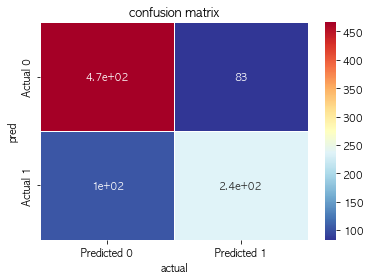

In [36]:
# 혼동행렬 (confusion matrix)
cm_df = pd.DataFrame(logreg.pred_table())
cm_df.columns = ['Predicted 0', 'Predicted 1']
cm_df = cm_df.rename(index={0: 'Actual 0',1: 'Actual 1'})
print(cm_df)

sns.heatmap(cm_df, cmap = 'RdYlBu_r', annot = True, annot_kws={"size": 10}, linewidths=.5)
plt.title('confusion matrix')
plt.xlabel('actual')
plt.ylabel('pred')
plt.show()